In [4]:
import plotly.graph_objects as go

def load_obj(file_path):
    """
    加载 .obj 文件，提取顶点和边信息。
    :param file_path: .obj 文件路径
    :return: 顶点列表和边列表
    """
    vertices = []
    edges = []

    with open(file_path, 'r') as file:
        for line in file:
            parts = line.strip().split()
            if len(parts) < 2:
                continue
            if parts[0] == 'v':  # 处理顶点
                x, y, z = map(float, parts[1:4])
                vertices.append((x, y, z))
            elif parts[0] == 'f':  # 处理边
                edge = tuple(map(float, parts[1:3]))
                edges.append((int(edge[0]) - 1, int(edge[1]) - 1))  # 转换为 0-based 索引
    return vertices, edges


def visualize_obj(file_path):
    """
    可视化 .obj 文件中的顶点和边。
    :param file_path: .obj 文件路径
    """
    # 加载顶点和边
    vertices, edges = load_obj(file_path)

    # 提取顶点坐标
    x_coords = [v[0] for v in vertices]
    y_coords = [v[1] for v in vertices]
    z_coords = [v[2] for v in vertices]

    # 创建 3D 点和线条数据
    scatter = go.Scatter3d(
        x=x_coords,
        y=y_coords,
        z=z_coords,
        mode='markers',
        marker=dict(size=5, color='red', opacity=0.8),
        name='Vertices'
    )

    lines = []
    for edge in edges:
        x_line = [vertices[edge[0]][0], vertices[edge[1]][0], None]
        y_line = [vertices[edge[0]][1], vertices[edge[1]][1], None]
        z_line = [vertices[edge[0]][2], vertices[edge[1]][2], None]
        lines.append(go.Scatter3d(
            x=x_line, y=y_line, z=z_line,
            mode='lines',
            line=dict(color='blue', width=2),
            name='Edges'
        ))

    # 创建 3D 图形
    fig = go.Figure(data=[scatter] + lines)
    fig.update_layout(
        scene=dict(
            xaxis_title='X',
            yaxis_title='Y',
            zaxis_title='Z',
        ),
        title="OBJ File Visualization",
        margin=dict(l=0, r=0, t=30, b=0)
    )

    # 显示图形
    fig.show()


In [8]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
def visualize_wireframe(file_path):
    """
    可视化 .obj 文件中的线框。
    :param file_path: .obj 文件路径
    """
    # 加载数据
    vertices, edges = load_obj(file_path)

    # 提取坐标
    x_coords = [v[0] for v in vertices]
    y_coords = [v[1] for v in vertices]
    z_coords = [v[2] for v in vertices]

    # 创建图形
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    # 绘制顶点
    ax.scatter(x_coords, y_coords, z_coords, color='red', s=10, label='Vertices')

    # 绘制边
    for edge in edges:
        x_line = [vertices[edge[0]][0], vertices[edge[1]][0]]
        y_line = [vertices[edge[0]][1], vertices[edge[1]][1]]
        z_line = [vertices[edge[0]][2], vertices[edge[1]][2]]
        ax.plot(x_line, y_line, z_line, color='blue', linewidth=1)

    # 设置视图参数
    ax.set_title("Wireframe Visualization")
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")
    ax.legend()

    # 显示图形
    plt.show()

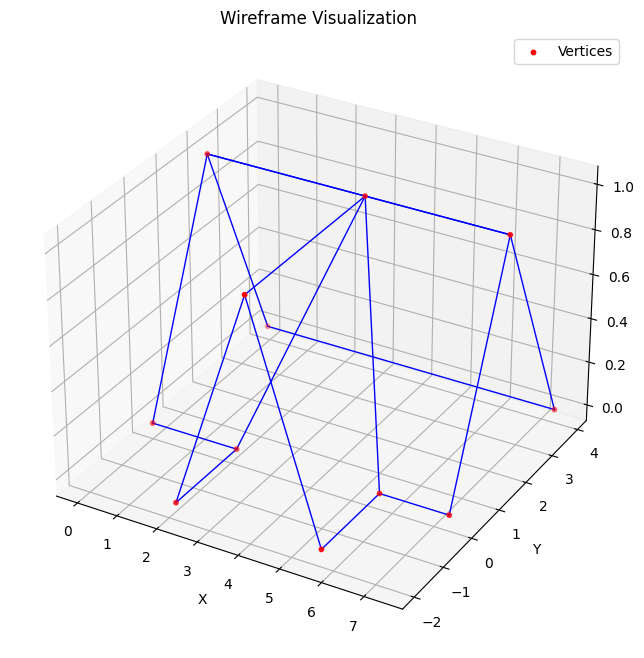

In [23]:
file_path = "/data/haoran/Point2Roof/output/pts6/results/001598.obj"  # 替换为你的 .obj 文件路径
visualize_wireframe(file_path)